In [7]:
## ver https://www.cs.upc.edu/~bejar/URL/material/URL_Lecture_Notes.pdf
## http://e-spacio.uned.es/fez/eserv/bibliuned:master-ETSInformatica-IAA-Dtizon/Tizon_Galisteo_Daniel_TFM.pdf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from kemlglearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from kemlglearn.metrics import scatter_matrices_scores
from sklearn.datasets import make_moons
from sklearn.manifold import Isomap

In [8]:
import numpy as np

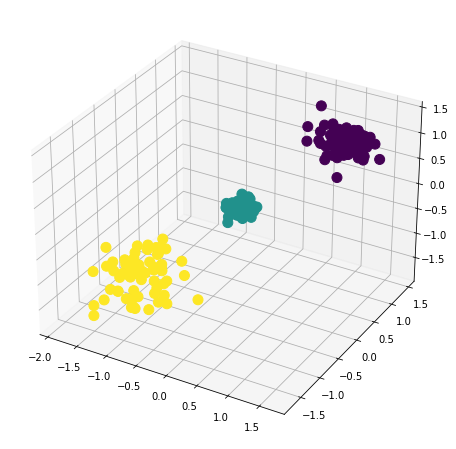

In [10]:
blobs, blabels = make_blobs(n_samples=200, n_features=3,centers=[[1,1,1],[0,0,0],[-1,-1,-1]], cluster_std=[0.2,0.1,0.3])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False,c=blabels, s=100)

In [12]:
km = KMeans(n_clusters=3, n_init=10, random_state=0)
labels = km.fit_predict(blobs)
print("AMI=", adjusted_mutual_info_score(blabels, labels))

AMI= 1.0000000000000002


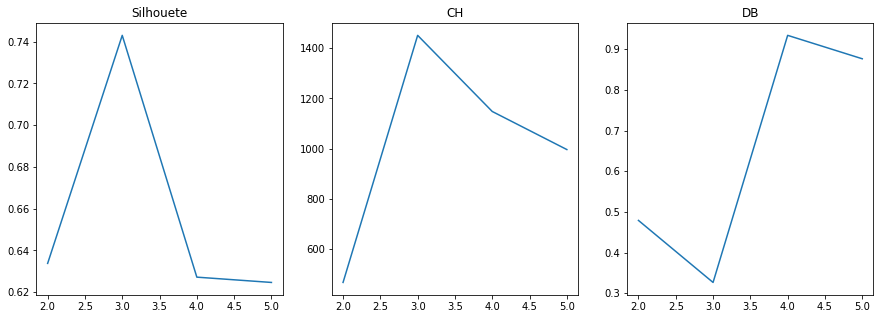

In [16]:
lscores = []
nclusters = 5
indices = ['Silhouete','CH','DB']
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(blobs)
    lscores.append((silhouette_score(blobs, labels),calinski_harabasz_score(blobs, labels),davies_bouldin_score(blobs, labels)))
fig = plt.figure(figsize=(15,5))
for i,ind in enumerate(indices):
    ax = fig.add_subplot(1,3,i+1)
    plt.title(ind)
    plt.plot(range(2,nclusters+1), [x[i] for x in lscores]);
    

Tenemos el valor máximo de Silhouete y CH para K=3. También para es valor, DB es mínimo. El número de clusters debe ser...

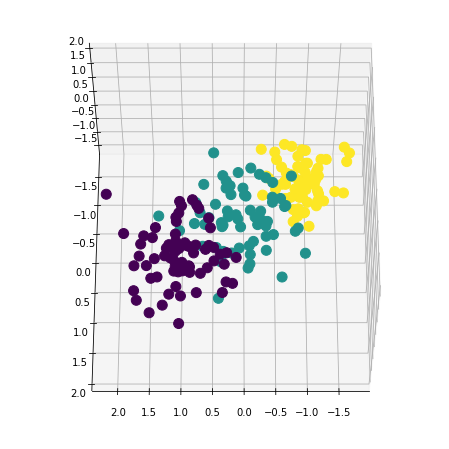

In [18]:
blobs, blabels = make_blobs(n_samples=200, n_features=3
                            ,centers=[[1,1,1],[0,0,0],[-1,-1,-1]], cluster_std=[0.4,0.45,0.3])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(60, 90)
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False,c=blabels, s=100);

In [19]:
km = KMeans(n_clusters=3, n_init=10, random_state=0)
labels = km.fit_predict(blobs)
print("AMI=",adjusted_mutual_info_score(blabels, labels))

AMI= 0.911005748508318


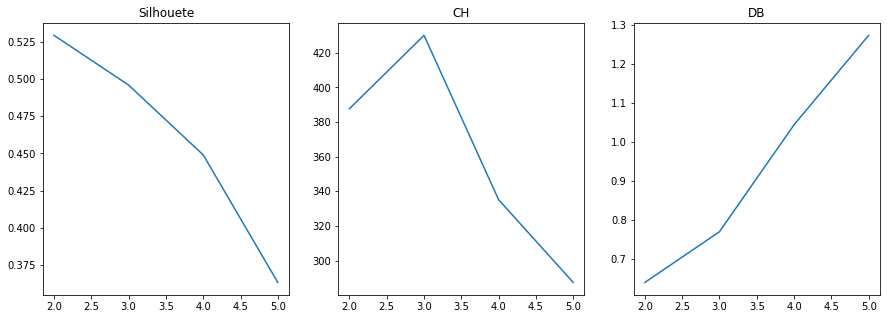

In [20]:
lscores = []
nclusters = 5
indices = ['Silhouete','CH','DB']
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(blobs)
    lscores.append((silhouette_score(blobs, labels),calinski_harabasz_score(blobs, labels),davies_bouldin_score(blobs, labels)))
fig = plt.figure(figsize=(15,5))
for i,ind in enumerate(indices):
    ax = fig.add_subplot(1,3,i+1)
    plt.title(ind)
    plt.plot(range(2,nclusters+1), [x[i] for x in lscores]);

Silhoute, DB -->2; CH --> 3

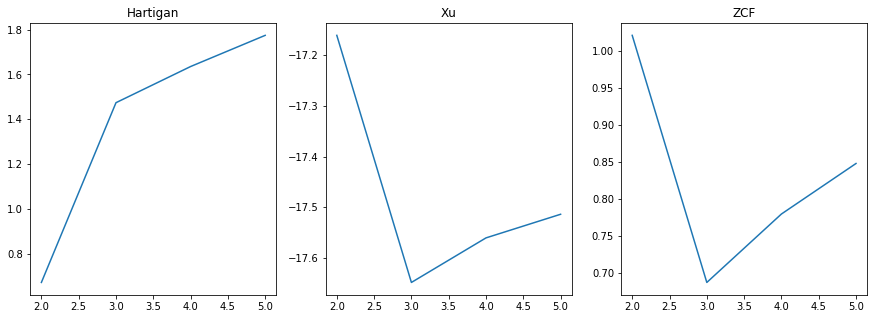

In [21]:
lscores = []
nclusters = 5
indices = ['Hartigan','Xu','ZCF']
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(blobs)
    lscores.append(scatter_matrices_scores(blobs, labels, indices= indices))
fig = plt.figure(figsize=(15,5))
for i, ind in enumerate(indices):
    ax = fig.add_subplot(1,3,i+1)
    plt.title(ind)
    plt.plot(range(2,nclusters+1), [x[ind] for x in lscores])
